## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

In [88]:
import pandas as pd
import numpy as np
import os

In [89]:
import spacy 
nlp = spacy.load("en_core_web_sm")

## Importing the necessary libraries

In [90]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [91]:
# Opening JSON file 
with open('complaints-2021-05-14_08_16.json') as f:
    data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [92]:
# Inspect the dataframe to understand the given data.
df.head(25)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [93]:
columns = df.columns.tolist()

# Print column names
print(pd.Series(columns))

0                                _index
1                                 _type
2                                   _id
3                                _score
4                          _source.tags
5                      _source.zip_code
6                  _source.complaint_id
7                         _source.issue
8                 _source.date_received
9                         _source.state
10            _source.consumer_disputed
11                      _source.product
12             _source.company_response
13                      _source.company
14                _source.submitted_via
15         _source.date_sent_to_company
16      _source.company_public_response
17                  _source.sub_product
18                       _source.timely
19      _source.complaint_what_happened
20                    _source.sub_issue
21    _source.consumer_consent_provided
dtype: object


In [94]:
#Assign new column names
cleaned_columns = [col.replace('_source.', '').replace('_', '') for col in columns]

# Print cleaned columns
print(pd.Series(cleaned_columns))

0                       index
1                        type
2                          id
3                       score
4                        tags
5                     zipcode
6                 complaintid
7                       issue
8                datereceived
9                       state
10           consumerdisputed
11                    product
12            companyresponse
13                    company
14               submittedvia
15          datesenttocompany
16      companypublicresponse
17                 subproduct
18                     timely
19      complaintwhathappened
20                   subissue
21    consumerconsentprovided
dtype: object


In [95]:
# Assign new column names
df.columns = cleaned_columns

# Print DataFrame with new column names
df.head(25)

,index,type,id,score,tags,zipcode,complaintid,issue,datereceived,state,...,companyresponse,company,submittedvia,datesenttocompany,companypublicresponse,subproduct,timely,complaintwhathappened,subissue,consumerconsentprovided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [96]:
# Get the shape and size of the dataset
print(f'Number of rows: \033[1m{df.shape[0]}\033[0m')
print(f'Number of columns: \033[1m{df.shape[1]}\033[0m')

Number of rows: 78313
Number of columns: 22


In [97]:
#Assign nan in place of blanks in the complaints column
df['complaintwhathappened'].replace('', np.nan, inplace=True)

In [98]:
df.complaintwhathappened.notna().sum()

21072

In [99]:
df.shape

(78313, 22)

In [100]:
#Remove all rows where complaints column is nan
df.dropna(subset=['complaintwhathappened'], inplace=True)

In [101]:
df.head(25)

,index,type,id,score,tags,zipcode,complaintid,issue,datereceived,state,...,companyresponse,company,submittedvia,datesenttocompany,companypublicresponse,subproduct,timely,complaintwhathappened,subissue,consumerconsentprovided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided
15,complaint-public-v2,complaint,3209411,0.0,None,None,3209411,Improper use of your report,2019-04-11T12:00:00-05:00,LA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-11T12:00:00-05:00,None,Credit reporting,Yes,Can you please remove inquiry,Credit inquiries on your report that you don't...,Consent provided
17,complaint-public-v2,complaint,3331023,0.0,None,770XX,3331023,Closing an account,2019-08-06T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-08-06T12:00:00-05:00,None,Checking account,Yes,With out notice J.P. Morgan Chase restricted m...,Funds not received from closed account,Consent provided
20,complaint-public-v2,complaint,3352857,0.0,None,207XX,3352857,Struggling to pay your loan,2019-08-24T12:00:00-05:00,MD,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-08-24T12:00:00-05:00,None,Loan,Yes,"During the summer months, I experience a decli...",Denied request to lower payments,Consent provided
21,complaint-public-v2,complaint,3226110,0.0,Servicemember,846XX,3226110,Fraud or scam,2019-04-29T12:00:00-05:00,UT,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-29T12:00:00-05:00,None,Domestic (US) money transfer,Yes,"On XXXX XX/XX/2019, I made a {$300.00} payment...",None,Consent provided
23,complaint-public-v2,complaint,3237765,0.0,None,330XX,3237765,Incorrect information on your report,2019-05-09T12:00:00-05:00,FL,...,Closed with non-monetary relief,JPMORGAN CHASE & CO.,Web,2019-05-09T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have a Chase credit card which is incorrectl...,Account information incorrect,Consent provided


In [102]:
df.shape

(21072, 22)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [103]:
# Write your function here to clean the text and remove all the unnecessary elements.
import re

def clean_text(text):
    # Make the text lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    return text


In [104]:
dirty_text = "This is an [example] text with 123 special characters!#"
cleaned_text = clean_text(dirty_text)
print(cleaned_text)

this is an text with special characters


In [105]:
#Write your function to Lemmatize the texts
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    # Process the text using spaCy
    doc = nlp(text)
    
    # Lemmatize each token in the processed text
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    # Join the lemmatized tokens back into a string
    lemmatized_text = ' '.join(lemmatized_tokens)
    
    return lemmatized_text


In [106]:
dirty_text = "The quick brown foxes jumped over the lazy dogs"
lemmatized_text = lemmatize_text(dirty_text)
print(lemmatized_text)

the quick brown fox jump over the lazy dog


In [107]:
# Apply clean_text and lemmatize_text functions
df['cleaned_text'] = df['complaintwhathappened'].apply(clean_text)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

# Print the DataFrame with the new columns
df.head(25)

,index,type,id,score,tags,zipcode,complaintid,issue,datereceived,state,...,submittedvia,datesenttocompany,companypublicresponse,subproduct,timely,complaintwhathappened,subissue,consumerconsentprovided,cleaned_text,lemmatized_text
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...
15,complaint-public-v2,complaint,3209411,0.0,None,None,3209411,Improper use of your report,2019-04-11T12:00:00-05:00,LA,...,Web,2019-04-11T12:00:00-05:00,None,Credit reporting,Yes,Can you please remove inquiry,Credit inquiries on your report that you don't...,Consent provided,can you please remove inquiry,can you please remove inquiry
17,complaint-public-v2,complaint,3331023,0.0,None,770XX,3331023,Closing an account,2019-08-06T12:00:00-05:00,TX,...,Web,2019-08-06T12:00:00-05:00,None,Checking account,Yes,With out notice J.P. Morgan Chase restricted m...,Funds not received from closed account,Consent provided,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...
20,complaint-public-v2,complaint,3352857,0.0,None,207XX,3352857,Struggling to pay your loan,2019-08-24T12:00:00-05:00,MD,...,Web,2019-08-24T12:00:00-05:00,None,Loan,Yes,"During the summer months, I experience a decli...",Denied request to lower payments,Consent provided,during the summer months i experience a declin...,during the summer month I experience a decline...
21,complaint-public-v2,complaint,3226110,0.0,Servicemember,846XX,3226110,Fraud or scam,2019-04-29T12:00:00-05:00,UT,...,Web,2019-04-29T12:00:00-05:00,None,Domestic (US) money transfer,Yes,"On XXXX XX/XX/2019, I made a {$300.00} payment...",None,Consent provided,on xxxx i made a payment to an online retailer...,on xxxx I make a payment to an online retailer...
23,complaint-public-v2,complaint,3237765,0.0,None,330XX,3237765,Incorrect information on your report,2019-05-09T12:00:00-05:00,FL,...,Web,2019-05-09T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have a Chase credit card which is incorrectl...,Account information incorrect,Consent pro

In [108]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaintwhathappened', 'lemmatized_text']].rename(columns={'complaintwhathappened': 'complaints', 'lemmatized_text': 'lemmatized_complaints'})

In [109]:
df_clean

,complaints,lemmatized_complaints
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell by ...
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket I come...
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...
...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx I call chas my xxxx xxxx...
78310,I am not familiar with XXXX pay and did not un...,I be not familiar with xxxx pay and do not und...
78311,I have had flawless credit for 30 yrs. I've ha...,I have have flawless credit for yrs I ve have ...


In [110]:
# Get the shape and size of the dataset
print(f'Number of rows: \033[1m{df_clean.shape[0]}\033[0m')
print(f'Number of columns: \033[1m{df_clean.shape[1]}\033[0m')

Number of rows: 21072
Number of columns: 2


In [111]:
#Write your function to extract the POS tags 

def pos_tag(text):
    # Process the text using spaCy
    doc = nlp(text)
    
    # Filter out tokens that are not nouns (NN)
    nouns = [token.lemma_ for token in doc if token.pos_ == 'NOUN' or token.pos_ == 'PRON']
    
    # Join the lemmatized nouns back into a string
    lemmatized_nouns = ' '.join(nouns)
    
    return lemmatized_nouns


# Apply pos_tag to create the new column 'complaint_POS_removed'
df_clean["complaint_POS_removed"] = df_clean["lemmatized_complaints"].apply(pos_tag)

In [112]:
!pip install TextBlob


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [113]:
#Write your function to extract the POS tags - version 2

from textblob import TextBlob

# Extracting singular nouns
def singular_nouns(text):
   
    
    # Creating a textblob object
    text_blob = TextBlob(text)
    
    # extracting words with tags 'NN', joining them and return
    return ' '.join([ word for (word,tag) in text_blob.tags if tag == "NN"])


# Apply pos_tag to create the new column 'complaint_POS_removed'
df_clean["complaint_POS_removed_ver2"] = df_clean["lemmatized_complaints"].apply(singular_nouns)

In [114]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,complaint_POS_removed_ver2
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning my name I it you I stop bank cardmembe...,morning name stop bank cardmember service ask ...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell by ...,I my xxxx agent who my anniversary date it age...,card agent upgrade date agent information orde...
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,chase card report application my identity my c...,card report application identity consent servi...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket I come...,xxxx xxxx ticket I offer ticket I reward card ...,try book xxxx ticket offer ticket card informa...
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...,my son I I it my chase account fund my chase b...,son chase account fund bank account pay money ...
...,...,...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,card customer decade solicitation credit card ...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx I call chas my xxxx xxxx...,I my xxxx credit card provider claim their pur...,visa credit card provider claim purchase prote...
78310,I am not familiar with XXXX pay and did not un...,I be not familiar with xxxx pay and do not und...,I xxxx risk this consumer I this it my chase b...,pay risk provide consumer bank app chase year ...
78311,I have had flawless credit for 30 yrs. I've ha...,I have have flawless credit for yrs I ve have ...,I credit yrs I chase credit card chase freedom...,credit yrs credit card chase freedom xxxx prob...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




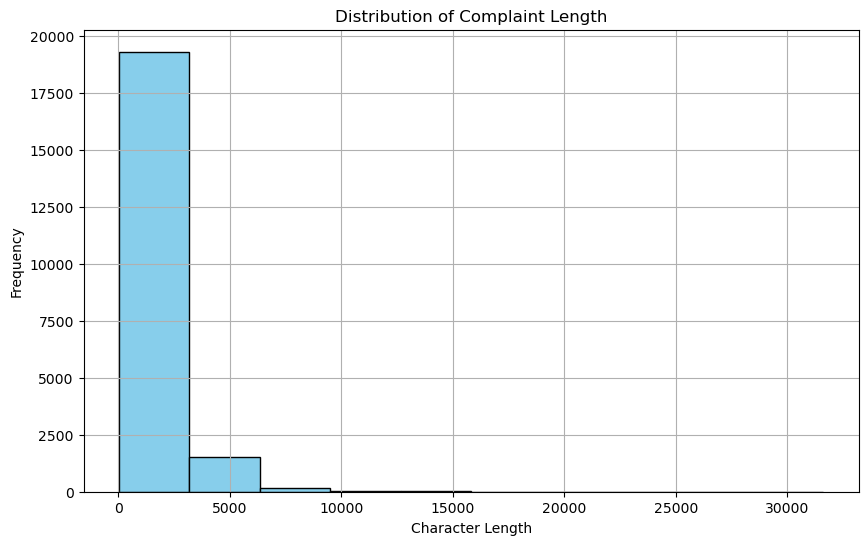

In [115]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10, 6))
plt.hist(df_clean['complaints'].str.len(), bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of Complaint Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=1.0)
plt.show()

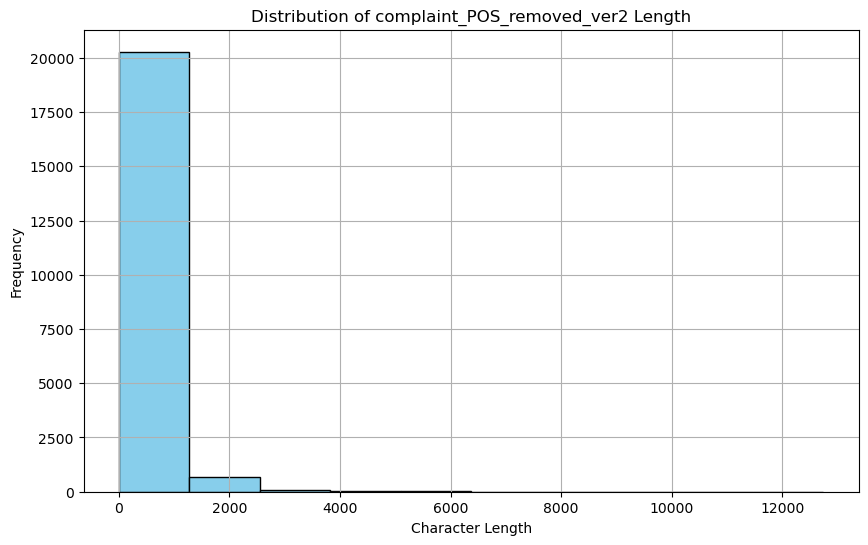

In [116]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10, 6))
plt.hist(df_clean['complaint_POS_removed_ver2'].str.len(), bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of complaint_POS_removed_ver2 Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=1.0)
plt.show()

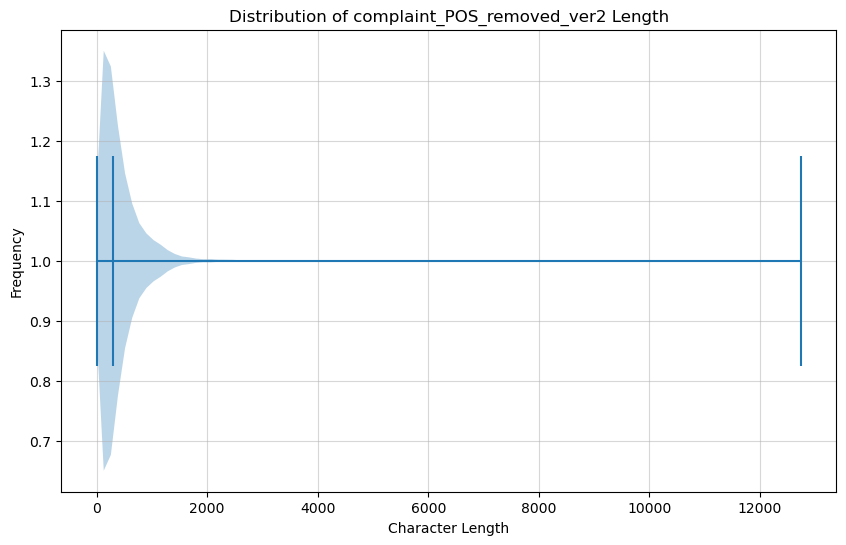

In [117]:
plt.figure(figsize=(10, 6))
plt.violinplot(df_clean['complaint_POS_removed_ver2'].str.len(), vert=False, widths=0.7, showmedians=True)

plt.title('Distribution of complaint_POS_removed_ver2 Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()

In [118]:
!pip install WordCloud


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [119]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#### Find the top 40 words by frequency among all the articles after processing the text.

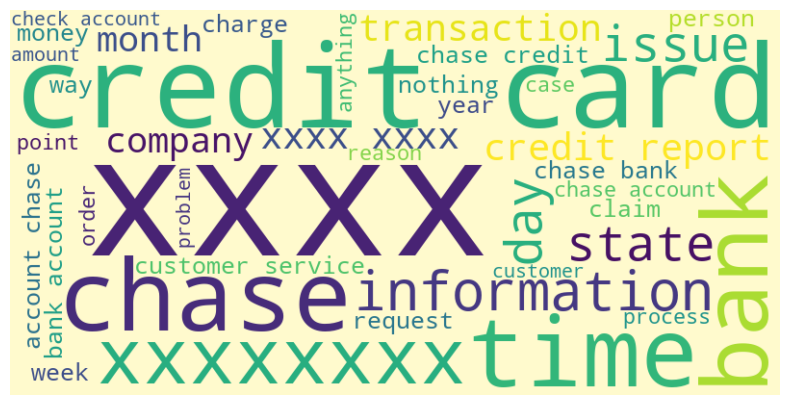

In [120]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

# Assuming 'complaint_POS_removed_ver2' is the column you want to visualize
text_data = df_clean['complaint_POS_removed_ver2'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='lemonchiffon', stopwords=stop, max_words=40).generate(text_data)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [121]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed_ver2'].str.replace('xxxx', '')

In [122]:
# Get the shape and size of the dataset
print(f'Number of rows: \033[1m{df_clean.shape[0]}\033[0m')
print(f'Number of columns: \033[1m{df_clean.shape[1]}\033[0m')

Number of rows: 21072
Number of columns: 5


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [123]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(df_clean['Complaint_clean'].values.astype('U'))
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

In [124]:
sorted_words_freq[:30]

[('account', 47532),
 ('chase', 46777),
 ('credit', 34148),
 ('card', 29286),
 ('bank', 28411),
 ('payment', 21167),
 ('time', 16008),
 ('charge', 14996),
 ('day', 12981),
 ('check', 12258),
 ('money', 11961),
 ('loan', 11001),
 ('state', 9684),
 ('letter', 9677),
 ('information', 9654),
 ('report', 8975),
 ('call', 8964),
 ('transaction', 8652),
 ('fee', 8635),
 ('number', 8629),
 ('month', 8474),
 ('amount', 8395),
 ('year', 8294),
 ('mortgage', 8199),
 ('customer', 8163),
 ('claim', 7852),
 ('balance', 7748),
 ('phone', 7720),
 ('service', 7695),
 ('company', 7626)]

In [125]:
#Method to fetch ngrams in given corpus 
def get_n_grams(corpus, n, ngram):
    vectorizer = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english')
    bag_of_words = vectorizer.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_words_freq[:n]   

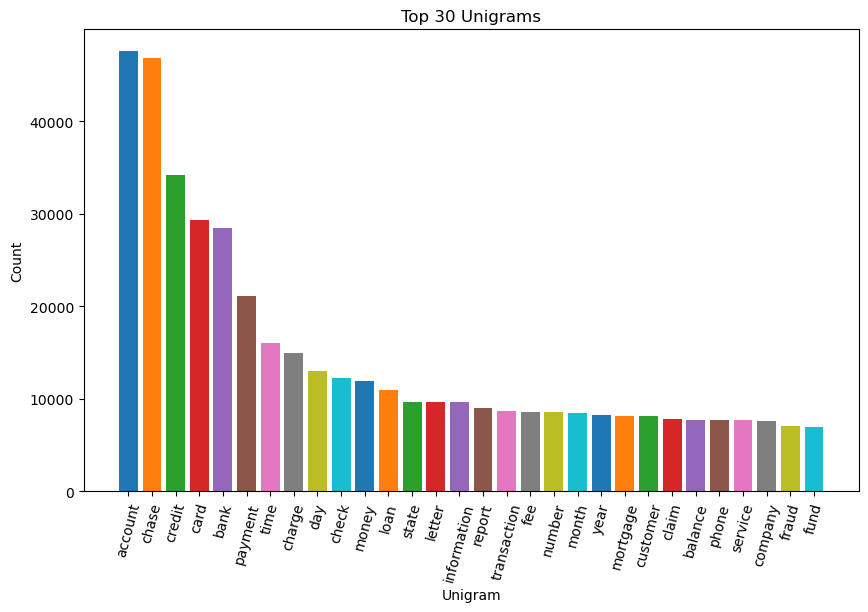

In [126]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_unigrams = pd.DataFrame(get_n_grams(df_clean['Complaint_clean'].values.astype('U'), 30, 1), columns=['unigram', 'count'])


# Extract the unigrams and their counts
unigrams = top_30_unigrams['unigram']
counts = top_30_unigrams['count']

# Define cool colors (you can customize these as per your preference)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(unigrams, counts, color=colors)
plt.xlabel('Unigram')
plt.ylabel('Count')
plt.title('Top 30 Unigrams')
plt.xticks(rotation=75)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [127]:
# Print the top 10 words in the unigram frequency
top_30_unigrams.head(10)

,unigram,count
0,account,47532
1,chase,46777
2,credit,34148
3,card,29286
4,bank,28411
5,payment,21167
6,time,16008
7,charge,14996
8,day,12981
9,check,12258


In [128]:
# words_freq = []

# for word, idx in vectorizer.vocabulary_.items():
#     frequency = sum_words[0, idx]
#     words_freq.append((word, frequency))

# pd.DataFrame(words_freq, columns=['word', 'freq'])


In [129]:
# help(bow_model)

# df_clean['complaint_POS_removed'].values.astype('U')

# pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names_out())

# print(bow_model.toarray())

# bow_model.shape

In [130]:
#POC code

    # from collections import Counter
    # from nltk.util import ngrams
    # from nltk.tokenize import word_tokenize


    # # Access the column and combine all text into one string
    # text_data = ' '.join(df_clean['Complaint_clean'])

    # # Tokenize the text
    # tokens = word_tokenize(text_data)

    # #Generate bigrams
    # bigrams = list(ngrams(tokens, 2))

    # #Count the frequency of each bigram
    # bigram_frequencies = Counter(bigrams)

    # #Get the top 30 bigrams
    # top_10_bigrams = bigram_frequencies.most_common(10)

    # # Display the top 30 bigrams
    # print(pd.DataFrame(top_10_bigrams))




In [131]:
#Print the top 10 words in the unigram frequency

# from collections import Counter

# from nltk.util import ngrams
# from nltk.tokenize import word_tokenize


# # Access the column and combine all text into one string
# text_data = ' '.join(df_clean['Complaint_clean'])

# # Tokenize the text
# tokens = word_tokenize(text_data)

# #Generate bigrams
# bigrams = list(ngrams(tokens, 2))

# #Count the frequency of each bigram
# bigram_frequencies = Counter(bigrams)

# #Get the top 30 bigrams
# top_10_bigrams = bigram_frequencies.most_common(10)

# # Display the top 30 bigrams
# print(pd.DataFrame(top_10_bigrams))

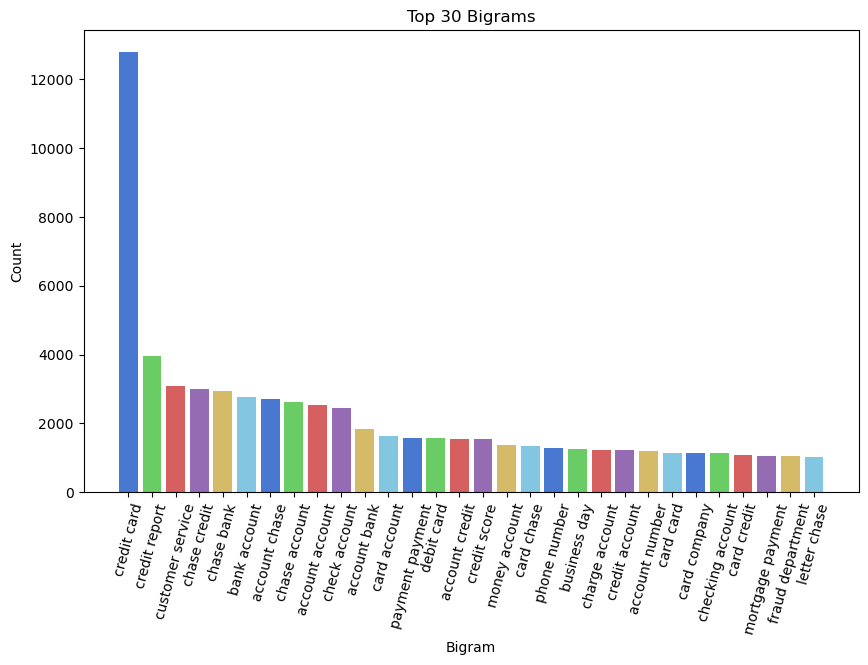

In [132]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).  
top_30_bigrams = pd.DataFrame(get_n_grams(df_clean['Complaint_clean'].values.astype('U'), 30, 2), columns=['bigram', 'count'])


# Extract the unigrams and their counts
bigrams = top_30_bigrams['bigram']
counts = top_30_bigrams['count']

# Use a better color palette (Seaborn's "deep" palette)
colors = sns.color_palette('muted6')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(bigrams, counts, color=colors)
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('Top 30 Bigrams')
plt.xticks(rotation=75)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [133]:
#Print the top 10 words in the bigram frequency
top_30_bigrams[:10]

,bigram,count
0,credit card,12785
1,credit report,3961
2,customer service,3083
3,chase credit,3010
4,chase bank,2950
5,bank account,2766
6,account chase,2703
7,chase account,2618
8,account account,2540
9,check account,2432


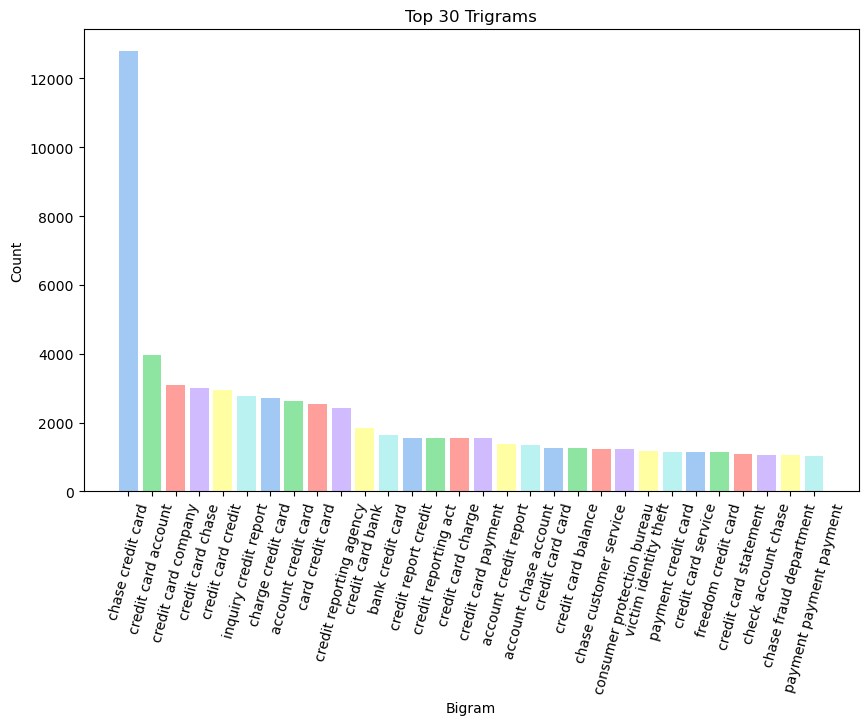

In [134]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_trigrams = pd.DataFrame(get_n_grams(df_clean['Complaint_clean'].values.astype('U'), 30, 3), columns=['Trigram', 'count'])


# Extract the unigrams and their counts
trigrams = top_30_trigrams['Trigram']
counts = top_30_bigrams['count']

# Use a better color palette (Seaborn's "deep" palette)
colors = sns.color_palette('pastel6')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(trigrams, counts, color=colors)
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('Top 30 Trigrams')
plt.xticks(rotation=75)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [135]:
#Print the top 10 words in the trigram frequency
top_30_trigrams[:10]

,Trigram,count
0,chase credit card,2092
1,credit card account,1033
2,credit card company,1000
3,credit card chase,663
4,credit card credit,540
5,inquiry credit report,490
6,charge credit card,431
7,account credit card,411
8,card credit card,407
9,credit reporting agency,384


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [136]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [137]:
#All masked texts has been removed
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,complaint_POS_removed_ver2,Complaint_clean
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning my name I it you I stop bank cardmembe...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell by ...,I my xxxx agent who my anniversary date it age...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,chase card report application my identity my c...,card report application identity consent servi...,card report application identity consent servi...
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket I come...,xxxx xxxx ticket I offer ticket I reward card ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...,my son I I it my chase account fund my chase b...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...
...,...,...,...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx I call chas my xxxx xxxx...,I my xxxx credit card provider claim their pur...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...
78310,I am not familiar with XXXX pay and did not un...,I be not familiar with xxxx pay and do not und...,I xxxx risk this consumer I this it my chase b...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...
78311,I have had flawless credit for 30 yrs. I've ha...,I have have flawless credit for yrs I ve have ...,I credit yrs I chase credit card chase freedom...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [138]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [139]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['complaint_POS_removed'])
pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names_out())

,aa,aarp,abandonment,abatement,abbreviation,abet,abide,ability,abovementione,abovereference,...,yoga,youinv,youth,yr,yrs,ytd,zip,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.151672,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [140]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [141]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40) #write your code here

In [142]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

6973

In [143]:
#Print the Top15 words for each of the topics
num_top_words = 15  # Number of top words to print for each topic
W = nmf_model.fit_transform(dtm)  # Document-topic matrix
H = nmf_model.components_       # Topic-term matrix

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

topics_dict = {}

# Iterate through each topic
for topic_idx, topic in enumerate(H):
    
#     print(f"Topic #{topic_idx + 1}:")
    
    # Get the indices of the top words for this topic
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    
    # Get the actual words corresponding to the indices
    top_words = [feature_names[i] for i in top_word_indices]
    
    # Store the topic and top words in the dictionary
    topics_dict[f"Topic {topic_idx + 1}"] = top_words
    
    # Print the top words for this topic
#     print(", ".join(top_words))
    print()
    
pd.DataFrame(topics_dict)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,account,card,loan,credit,payment
1,check,charge,mortgage,report,balance
2,bank,chase,xxxx,inquiry,month
3,money,credit,chase,card,fee
4,fund,xxxx,home,account,statement
5,chase,dispute,modification,score,xxxxxxxx
6,deposit,transaction,property,company,day
7,xxxx,purchase,year,debt,time
8,branch,fee,letter,reporting,chase
9,day,fraud,document,information,auto


In [144]:
#Print the Top15 words for each of the topics
for index,topic in enumerate(nmf_model.components_):
    print(f'\033[1mTHE TOP 15 WORDS FOR TOPIC #{index + 1}', '\033[0m')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1 
['claim', 'business', 'number', 'checking', 'transaction', 'day', 'branch', 'xxxx', 'deposit', 'chase', 'fund', 'money', 'bank', 'check', 'account']


THE TOP 15 WORDS FOR TOPIC #2 
['xxxxxxxx', 'time', 'balance', 'merchant', 'service', 'fraud', 'fee', 'purchase', 'transaction', 'dispute', 'xxxx', 'credit', 'chase', 'charge', 'card']


THE TOP 15 WORDS FOR TOPIC #3 
['sale', 'house', 'foreclosure', 'rate', 'time', 'document', 'letter', 'year', 'property', 'modification', 'home', 'chase', 'xxxx', 'mortgage', 'loan']


THE TOP 15 WORDS FOR TOPIC #4 
['chase', 'theft', 'limit', 'application', 'identity', 'information', 'reporting', 'debt', 'company', 'score', 'account', 'card', 'inquiry', 'report', 'credit']


THE TOP 15 WORDS FOR TOPIC #5 
['year', 'pay', 'credit', 'date', 'xxxx', 'auto', 'chase', 'time', 'day', 'xxxxxxxx', 'statement', 'fee', 'month', 'balance', 'payment']




In [145]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

# Get the topic distribution for each complaint
topic_distribution = nmf_model.transform(dtm)

# Assign the best topic (topic with highest weight) for each complaint
best_topics = topic_distribution.argmax(axis=1)

# Print the best topic for each complaint
for i, best_topic in enumerate(best_topics):
    print(f"Complaint #{i + 1} is best described by Topic #{best_topic}")

Complaint #1 is best described by Topic #0
Complaint #2 is best described by Topic #2
Complaint #3 is best described by Topic #3
Complaint #4 is best described by Topic #3
Complaint #5 is best described by Topic #0
Complaint #6 is best described by Topic #3
Complaint #7 is best described by Topic #0
Complaint #8 is best described by Topic #4
Complaint #9 is best described by Topic #1
Complaint #10 is best described by Topic #3
Complaint #11 is best described by Topic #0
Complaint #12 is best described by Topic #3
Complaint #13 is best described by Topic #0
Complaint #14 is best described by Topic #0
Complaint #15 is best described by Topic #1
Complaint #16 is best described by Topic #0
Complaint #17 is best described by Topic #1
Complaint #18 is best described by Topic #0
Complaint #19 is best described by Topic #2
Complaint #20 is best described by Topic #1
Complaint #21 is best described by Topic #2
Complaint #22 is best described by Topic #1
Complaint #23 is best described by Topic 

In [146]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = best_topics#write your code to assign topics to each rows.

In [147]:
df_clean.head()

,complaints,lemmatized_complaints,complaint_POS_removed,complaint_POS_removed_ver2,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning my name I it you I stop bank cardmembe...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell by ...,I my xxxx agent who my anniversary date it age...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,2
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,chase card report application my identity my c...,card report application identity consent servi...,card report application identity consent servi...,3
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket I come...,xxxx xxxx ticket I offer ticket I reward card ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,3
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...,my son I I it my chase account fund my chase b...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0


In [148]:
#Print the first 5 Complaint for each of the Topics
df_clean_groupby=df_clean.groupby('Topic').head(10)
df_clean_groupby.sort_values('Topic')

,complaints,lemmatized_complaints,complaint_POS_removed,complaint_POS_removed_ver2,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning my name I it you I stop bank cardmembe...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
92,"In XX/XX/2019, several transactions on my Chas...",in several transaction on my chase checking ac...,transaction my chase checking account I report...,transaction chase account report help account ...,transaction chase account report help account ...,0
69,Someone called stating I had felony committed ...,someone call state I have felony commit under ...,someone state I felony commit my security numb...,someone call state commit security number chec...,someone call state commit security number chec...,0
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...,my son I I it my chase account fund my chase b...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0
17,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restrict my ac...,notice my account my debit card I branch custo...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0
24,mishandling of this account by Chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account chase auto xxxx,mishandle account auto xxxx,mishandle account auto,0
27,I opened an account with chase bank on XXXX an...,I open an account with chase bank on xxxx and ...,I account bank code bonus I xxxxxxxx term ever...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
30,"To whom it may concern, Chase bank charged wro...",to whom it may concern chase bank charge wrong...,whom it bank overdraft fee I alert balance fee...,concern bank charge fee balance fee balance tr...,concern bank charge fee balance fee balance tr...,0
42,My card went missing and i didnt realize it un...,my card go missing and I do not realize it unt...,my card I it today I my email they there depos...,card today email money bank account go,card today email money bank account go,0
35,I opened the saving account for the {$25.00} b...,I open the save account for the bonus I be sup...,I save account bonus I bonus auto transfer che...,save account bonus bonus auto transfer check t...,save account bonus bonus auto transfer check t...,0


In [149]:
df_clean.shape

(21072, 6)

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [150]:
#Create the dictionary of Topic names and Topics

Topic_names = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Mortgage/Loan',
    3: 'Theft/Dispute Reporting',
    4: 'Others'
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [151]:
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,complaint_POS_removed_ver2,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning my name I it you I stop bank cardmembe...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Bank Account services
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell by ...,I my xxxx agent who my anniversary date it age...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Mortgage/Loan
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,chase card report application my identity my c...,card report application identity consent servi...,card report application identity consent servi...,Theft/Dispute Reporting
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket I come...,xxxx xxxx ticket I offer ticket I reward card ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Theft/Dispute Reporting
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...,my son I I it my chase account fund my chase b...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Bank Account services
...,...,...,...,...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,Credit card or prepaid card
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx I call chas my xxxx xxxx...,I my xxxx credit card provider claim their pur...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,Credit card or prepaid card
78310,I am not familiar with XXXX pay and did not un...,I be not familiar with xxxx pay and do not und...,I xxxx risk this consumer I this it my chase b...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...,Credit card or prepaid card
78311,I have had flawless credit for 30 yrs. I've ha...,I have have flawless credit for yrs I ve have ...,I credit yrs I chase credit card chase freedom...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...,Others


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [152]:
#Create the dictionary again of Topic names and Topics

Topic_names = {
    'Bank Account services': 0,
    'Credit card or prepaid card': 1,
    'Mortgage/Loan': 2,
    'Theft/Dispute Reporting': 3,
    'Others': 4
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [153]:
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,complaint_POS_removed_ver2,Complaint_clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name be xxxx xxxx and I apprec...,morning my name I it you I stop bank cardmembe...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade my xxxx xxxx card in and be tell by ...,I my xxxx agent who my anniversary date it age...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,2
10,Chase Card was reported on XX/XX/2019. However...,chase card be report on however fraudulent app...,chase card report application my identity my c...,card report application identity consent servi...,card report application identity consent servi...,3
11,"On XX/XX/2018, while trying to book a XXXX XX...",on while try to book a xxxx xxxx ticket I come...,xxxx xxxx ticket I offer ticket I reward card ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,3
14,my grand son give me check for {$1600.00} i de...,my grand son give I check for I deposit it int...,my son I I it my chase account fund my chase b...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0
...,...,...,...,...,...,...
78303,After being a Chase Card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,1
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xxxxxxxx I call chas my xxxx xxxx...,I my xxxx credit card provider claim their pur...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,1
78310,I am not familiar with XXXX pay and did not un...,I be not familiar with xxxx pay and do not und...,I xxxx risk this consumer I this it my chase b...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...,1
78311,I have had flawless credit for 30 yrs. I've ha...,I have have flawless credit for yrs I ve have ...,I credit yrs I chase credit card chase freedom...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...,4


In [154]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[["complaints","Topic"]]

In [155]:
training_data

,complaints,Topic
1,Good morning my name is XXXX XXXX and I apprec...,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,2
10,Chase Card was reported on XX/XX/2019. However...,3
11,"On XX/XX/2018, while trying to book a XXXX XX...",3
14,my grand son give me check for {$1600.00} i de...,0
...,...,...
78303,After being a Chase Card customer for well ove...,1
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",1
78310,I am not familiar with XXXX pay and did not un...,1
78311,I have had flawless credit for 30 yrs. I've ha...,4


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [156]:

#Write your code to get the Vector count
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer and transform the training data
# X_train_vectorized is the document-term matrix containing the vectorized training data
X_train_vectorized = vectorizer.fit_transform(training_data['complaints'])



#Write your code here to transform the word vector to tf-idf

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the word vectors into TF-IDF vectors
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vectorized)

In [157]:
from sklearn.model_selection import train_test_split

y_topics = training_data['Topic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_topics, test_size=0.2, random_state=42)

# X_train and y_train will contain the training data and corresponding topics
# X_test and y_test will contain the testing data and corresponding topics

print(f"Shape of X_train:\033[1m {X_train.shape}", '\033[0m')
print(f"Shape of y_train:\033[1m {y_train.shape}", '\033[0m')
print(f"Shape of X_test:\033[1m {X_test.shape}", '\033[0m')
print(f"Shape of y_test:\033[1m {y_test.shape}", '\033[0m')

Shape of X_train: (16857, 29725) 
Shape of y_train: (16857,) 
Shape of X_test: (4215, 29725) 
Shape of y_test: (4215,) 


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [161]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_logistic_regression_model(y_true, y_pred):
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [159]:
# Write your code here to build any 3 models and evaluate them using the required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict the topics on the test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.79%


/Users/b0v01hy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [160]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

F1 Score: 91.76%


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1123
           1       0.90      0.95      0.92      1244
           2       0.92      0.92      0.92       767
           3       0.93      0.87      0.90       614
           4       0.97      0.84      0.90       467

    accuracy                           0.92      4215
   macro avg       0.93      0.90      0.91      4215
weighted avg       0.92      0.92      0.92      4215



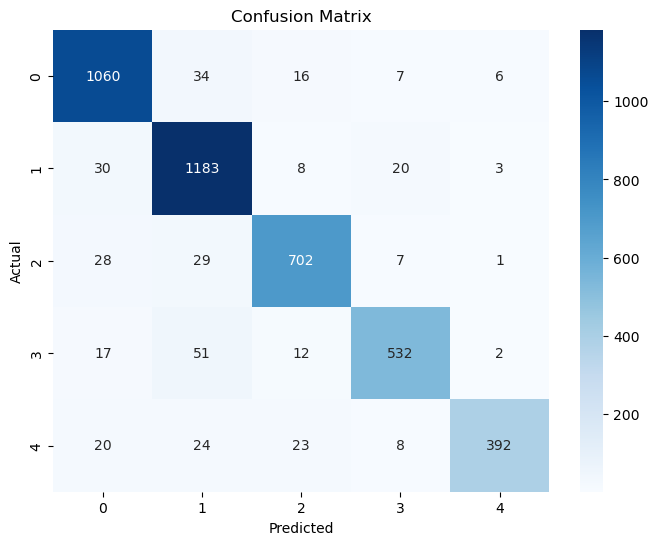

In [162]:
# Assuming y_test and y_pred are available
evaluate_logistic_regression_model(y_test, y_pred)
